# Data Processing

In [1]:
#Set match id in match_id_required.

#Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas.io.json import json_normalize
import os 
import pandas as pd
os.chdir('/Users/nhatpham/Downloads/')


#extract id of all matches from which we extract data from
competition_id = 43
match_ids = []

#Create a list having ids of 64 WC matches
with open('open-data-master/data/matches/'+str(competition_id)+'/3.json') as f:
    matches = json.load(f)
for i in matches:
    match_ids.append(i['match_id'])



In [2]:
#Loop through events of all 64 matches to retain shooting events only.
#Also make some changes in the format of variables of later uses.
selected_var = ['player_name', 'location', 'shot_type_name', 'play_pattern_name', 'shot_statsbomb_xg', 'shot_end_location', 'shot_technique_name', 
                   'shot_body_part_name', 'shot_outcome_name', 'shot_freeze_frame', 'team_name']
table = pd.DataFrame(columns =  selected_var)
for match_id in match_ids:
    
#     print(match_id)
    file_name = str(match_id)+'.json'
    
    with open('open-data-master/data/events/'+file_name) as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = "_").assign(match_id = match_id)
    if 'shot_deflected' not in df.columns.values:
        df['shot_deflected'] = float("NaN")
        
    team1 = df.team_name[0]
    gk1 = df[df.type_name == 'Starting XI'].tactics_lineup[0][0]['player']['name']
    team2 = df.team_name[1]
    gk2 = df[df.type_name == 'Starting XI'].tactics_lineup[1][0]['player']['name']
    
    
    with open('open-data-master/data/lineups/'+file_name) as data_file:
        #print (mypath+'events/'+file)
        lineups = json.load(data_file)
    names_dict = {player["player_name"]: player["player_nickname"] for team in lineups for player in team["lineup"]}
    

    df_shot = df[df['type_name'] == 'Shot'][selected_var]
    df_shot['player_nickname'] = df_shot['player_name'].apply(lambda x: names_dict[x])
    df_shot['gk_fullname'] = df_shot.team_name.apply(lambda x: gk1 if x == team2 else gk2)
    
    new_col_order = ['player_name', 'player_nickname', 'location', 'shot_type_name', 'play_pattern_name', 'shot_statsbomb_xg', 'shot_end_location', 'shot_technique_name', 
                    'shot_body_part_name', 'shot_outcome_name', 'shot_freeze_frame', 'gk_fullname', 'team_name']
    df_shot = df_shot[new_col_order] 

    table = pd.concat([table, df_shot], ignore_index=True)
# table.to_csv('table.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
#save the dataset to avoid rerunning the above code in the future
provision = table

In [4]:
#If a player does not have nickname, fill this filed with his fullname
for i in range(len(table.player_nickname.isna())):
    if table.player_nickname.isna()[i]:
        table.iloc[i,4] = table.iloc[i,3]
table

,gk_fullname,location,play_pattern_name,player_name,player_nickname,shot_body_part_name,shot_end_location,shot_freeze_frame,shot_outcome_name,shot_statsbomb_xg,shot_technique_name,shot_type_name,team_name
0,Danijel Subašić,"[115.0, 34.0]",From Throw In,Mathias Jattah-Njie Jørgensen,Zanka,Left Foot,"[119.0, 39.7, 0.2]","[{'location': [120.0, 38.0], 'player': {'id': ...",Goal,0.074087,Normal,Open Play,Denmark
1,Kasper Schmeichel,"[112.0, 36.0]",From Throw In,Mario Mandžukić,Mario Mandžukić,Right Foot,"[120.0, 36.4, 1.1]","[{'location': [103.0, 42.0], 'player': {'id': ...",Goal,0.292995,Normal,Open Play,Croatia
2,Kasper Schmeichel,"[101.0, 55.0]",From Free Kick,Ivan Perišić,Ivan Perišić,Left Foot,"[110.0, 48.0]","[{'location': [119.0, 39.0], 'player': {'id': ...",Blocked,0.078714,Normal,Free Kick,Croatia
3,Kasper Schmeichel,"[103.0, 24.0]",From Throw In,Ivan Perišić,Ivan Perišić,Right Foot,"[105.0, 27.0]","[{'location': [118.0, 38.0], 'player': {'id': ...",Blocked,0.028038,Normal,Open Play,Croatia
4,Danijel Subašić,"[96.0, 37.0]",Regular Play,Christian Dannemann Eriksen,Christian Eriksen,Right Foot,"[99.0, 36.0]","[{'location': [116.0, 41.0], 'player': {'id': ...",Blocked,0.064261,Normal,Open Play,Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,Manuel Neuer,"[110.0, 45.0]",From Free Kick,Andreas Granqvist,Andreas Granqvist,Head,"[118.0, 36.4, 1.0]","[{'location': [111.0, 51.0], 'player': {'id': ...",Saved,0.036863,Normal,Open Play,Sweden
1702,Robin Olsen,"[111.0, 40.0]",Regular Play,Mario Gómez García,Mario Gómez,Head,"[119.0, 39.9, 2.3]","[{'location': [119.0, 41.0], 'player': {'id': ...",Saved,0.077663,Normal,Open Play,Germany
1703,Robin Olsen,"[101.0, 46.0]",From Corner,Julian Brandt,Julian Brandt,Left Foot,"[119.0, 35.8, 0.7]","[{'location': [119.0, 43.0], 'player': {'id': ...",Post,0.056542,Normal,Open Play,Germany
1704,Manuel Neuer,"[107.0, 59.0]",Regular Play,John Guidetti,John Guidetti,Right Foot,"[119.0, 43.4, 0.4]","[{'location': [119.0, 42.0], 'player': {'id': ...",Saved,0.016920,Normal,Open Play,Sweden


<b>Calculate distance and shooting angle</b>

In [5]:
#Calculate the distance and the angle of a shot from the location of the ball
#The formulae are explained in the appendix
table['X'] = table.location.apply(lambda x: x[0])
table['Y'] = table.location.apply(lambda x: x[1])
table['distance'] = ((120-table['X'])**2 + (table['Y']-40)**2)**(1/2)
#the formula is borrowed from Friends of Tracking
table['tan_angle'] = 8 *(120-table['X']) /((120-table['X'])**2 + (table['Y']-40)**2 - (8/2)**2)

table

,gk_fullname,location,play_pattern_name,player_name,player_nickname,shot_body_part_name,shot_end_location,shot_freeze_frame,shot_outcome_name,shot_statsbomb_xg,shot_technique_name,shot_type_name,team_name,X,Y,distance,tan_angle
0,Danijel Subašić,"[115.0, 34.0]",From Throw In,Mathias Jattah-Njie Jørgensen,Zanka,Left Foot,"[119.0, 39.7, 0.2]","[{'location': [120.0, 38.0], 'player': {'id': ...",Goal,0.074087,Normal,Open Play,Denmark,115.0,34.0,7.810250,0.888889
1,Kasper Schmeichel,"[112.0, 36.0]",From Throw In,Mario Mandžukić,Mario Mandžukić,Right Foot,"[120.0, 36.4, 1.1]","[{'location': [103.0, 42.0], 'player': {'id': ...",Goal,0.292995,Normal,Open Play,Croatia,112.0,36.0,8.944272,1.000000
2,Kasper Schmeichel,"[101.0, 55.0]",From Free Kick,Ivan Perišić,Ivan Perišić,Left Foot,"[110.0, 48.0]","[{'location': [119.0, 39.0], 'player': {'id': ...",Blocked,0.078714,Normal,Free Kick,Croatia,101.0,55.0,24.207437,0.266667
3,Kasper Schmeichel,"[103.0, 24.0]",From Throw In,Ivan Perišić,Ivan Perišić,Right Foot,"[105.0, 27.0]","[{'location': [118.0, 38.0], 'player': {'id': ...",Blocked,0.028038,Normal,Open Play,Croatia,103.0,24.0,23.345235,0.257089
4,Danijel Subašić,"[96.0, 37.0]",Regular Play,Christian Dannemann Eriksen,Christian Eriksen,Right Foot,"[99.0, 36.0]","[{'location': [116.0, 41.0], 'player': {'id': ...",Blocked,0.064261,Normal,Open Play,Denmark,96.0,37.0,24.186773,0.337434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,Manuel Neuer,"[110.0, 45.0]",From Free Kick,Andreas Granqvist,Andreas Granqvist,Head,"[118.0, 36.4, 1.0]","[{'location': [111.0, 51.0], 'player': {'id': ...",Saved,0.036863,Normal,Open Play,Sweden,110.0,45.0,11.180340,0.733945
1702,Robin Olsen,"[111.0, 40.0]",Regular Play,Mario Gómez García,Mario Gómez,Head,"[119.0, 39.9, 2.3]","[{'location': [119.0, 41.0], 'player': {'id': ...",Saved,0.077663,Normal,Open Play,Germany,111.0,40.0,9.000000,1.107692
1703,Robin Olsen,"[101.0, 46.0]",From Corner,Julian Brandt,Julian Brandt,Left Foot,"[119.0, 35.8, 0.7]","[{'location': [119.0, 43.0], 'player': {'id': ...",Post,0.056542,Normal,Open Play,Germany,101.0,46.0,19.924859,0.398950
1704,Manuel Neuer,"[107.0, 59.0]",Regular Play,John Guidetti,John Guidetti,Right Foot,"[119.0, 43.4, 0.4]","[{'location': [119.0, 42.0], 'player': {'id': ...",Saved,0.016920,Normal,Open Play,Sweden,107.0,59.0,23.021729,0.202335


In [6]:
#Reformat nickname of players to merge with Fifa 2018 player dataset
def name(x):
    format_name = x
    try:
        name_list = x.split(' ')
        if len(name_list) == 2:
            format_name = str(list(name_list[0])[0])+ '. ' + name_list[1]
            
    except:
        pass
    return(format_name)

table['shooter_name'] = table.player_nickname.apply(lambda x: name(x))
table['gk_name'] = table.gk_fullname.apply(lambda x: name(x))

#Deal with edge cases

map_name = {"Diego da Silva Costa" : "Diego Costa",
            "Douglas Costa de Souza": "Douglas Costa",
            "Adrien Sébastien Perruchet da Silva" : "Adrien Silva",
            "André Miguel Valente da Silva" : "André Silva",
            "Mário Figueira Fernandes" : "Mário Fernandes",
            "Manuel Henrique Tavares Fernandes" : "Manuel Fernandes",
            "Bruno Miguel Borges Fernandes" : "Bruno Fernandes"}
for m in map_name.keys():
    for i in table[table['player_name'] == m].index:
        table.at[i, 'shooter_name'] = map_name[m]


In [7]:
#load data
player_data = pd.read_csv('fifa2018.csv')


def name1(x):
    format_name = x
    if '.' not in list(x):
        try:
            name_list = x.split(' ')
            if len(name_list) == 2:
                format_name = str(list(name_list[0])[0])+ '. ' + name_list[1]

        except:
            pass
    return(format_name)
player_data['all_name'] = player_data.name.apply(lambda x: name1(x))

#Deal with edge cases
#Additionally, I had to adjust more than 100 datapoints in the dataset to merge successfully and accurately
map_name = {"Diego da Silva Costa" : "Diego Costa",
            "Douglas Costa de Souza": "Douglas Costa",
            "Adrien Sébastien Perruchet da Silva" : "Adrien Silva",
            "André Miguel Valente da Silva" : "André Silva",
            "Mário Figueira Fernandes" : "Mário Fernandes",
            "Manuel H. Tavares Fernandes" : "Manuel Fernandes",
            "Bruno Miguel Borges Fernandes" : "Bruno Fernandes"}

for m in map_name.keys():
    for i in player_data[player_data['full_name'] == m].index:
        player_data.at[i, 'all_name'] = map_name[m]

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#merge data
#finishing variables are for players who made the shot recored in each row
#gk variables are for goal keepers who saved those shots
finishing = ['all_name', 'full_name', 'sho', 'weak_foot', 'preferred_foot', 'finishing', 'heading_accuracy', 'shot_power', 'jumping', 'strength', 'long_shots', 'positioning', 'balance', 'height_cm',]
gk = ['all_name', 'gk', 'gk_diving', 'gk_handling', 'gk_positioning', 'gk_reflexes']
player_data_att = player_data[finishing]
player_data_gk = player_data[gk]
mergeddf = pd.merge(table, player_data_att, left_on='shooter_name', right_on='all_name', how = 'left')
mergeddf = pd.merge(mergeddf, player_data_gk, left_on='gk_name', right_on='all_name', how = 'left')

#drop unnecessary columns
try:
    mergeddf.drop(['gk_fullname', 'player_name', 'player_nickname', 'shot_end_location', "all_name_x", "all_name_y"], axis = 1, inplace = True)
except:
    pass


In [9]:
mergeddf

,location,play_pattern_name,shot_body_part_name,shot_freeze_frame,shot_outcome_name,shot_statsbomb_xg,shot_technique_name,shot_type_name,team_name,X,...,strength,long_shots,positioning,balance,height_cm,gk,gk_diving,gk_handling,gk_positioning,gk_reflexes
0,"[115.0, 34.0]",From Throw In,Left Foot,"[{'location': [120.0, 38.0], 'player': {'id': ...",Goal,0.074087,Normal,Open Play,Denmark,115.0,...,84.0,30.0,46.0,55.0,191.0,85.0,84.0,79.0,85.0,87.0
1,"[112.0, 36.0]",From Throw In,Right Foot,"[{'location': [103.0, 42.0], 'player': {'id': ...",Goal,0.292995,Normal,Open Play,Croatia,112.0,...,87.0,58.0,89.0,53.0,190.0,83.0,83.0,82.0,80.0,86.0
2,"[101.0, 55.0]",From Free Kick,Left Foot,"[{'location': [119.0, 39.0], 'player': {'id': ...",Blocked,0.078714,Normal,Free Kick,Croatia,101.0,...,75.0,80.0,84.0,67.0,187.0,83.0,83.0,82.0,80.0,86.0
3,"[103.0, 24.0]",From Throw In,Right Foot,"[{'location': [118.0, 38.0], 'player': {'id': ...",Blocked,0.028038,Normal,Open Play,Croatia,103.0,...,75.0,80.0,84.0,67.0,187.0,83.0,83.0,82.0,80.0,86.0
4,"[96.0, 37.0]",Regular Play,Right Foot,"[{'location': [116.0, 41.0], 'player': {'id': ...",Blocked,0.064261,Normal,Open Play,Denmark,96.0,...,57.0,84.0,81.0,82.0,182.0,85.0,84.0,79.0,85.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,"[110.0, 45.0]",From Free Kick,Head,"[{'location': [111.0, 51.0], 'player': {'id': ...",Saved,0.036863,Normal,Open Play,Sweden,110.0,...,83.0,59.0,54.0,36.0,192.0,92.0,91.0,90.0,91.0,89.0
1702,"[111.0, 40.0]",Regular Play,Head,"[{'location': [119.0, 41.0], 'player': {'id': ...",Saved,0.077663,Normal,Open Play,Germany,111.0,...,86.0,78.0,84.0,53.0,189.0,74.0,71.0,73.0,72.0,75.0
1703,"[101.0, 46.0]",From Corner,Left Foot,"[{'location': [119.0, 43.0], 'player': {'id': ...",Post,0.056542,Normal,Open Play,Germany,101.0,...,65.0,73.0,77.0,75.0,183.0,74.0,71.0,73.0,72.0,75.0
1704,"[107.0, 59.0]",Regular Play,Right Foot,"[{'location': [119.0, 42.0], 'player': {'id': ...",Saved,0.016920,Normal,Open Play,Sweden,107.0,...,82.0,80.0,79.0,58.0,185.0,92.0,91.0,90.0,91.0,89.0


In [10]:
mergeddf.groupby('shot_type_name').size()

shot_type_name
Free Kick      82
Open Play    1556
Penalty        68
dtype: int64

<b>data1 is used to train P(on target)</b>

In [11]:
#select open-play shots only
data1 = mergeddf[mergeddf.shot_type_name == 'Open Play']
data1 = data1.reset_index(drop = True)
data1

,location,play_pattern_name,shot_body_part_name,shot_freeze_frame,shot_outcome_name,shot_statsbomb_xg,shot_technique_name,shot_type_name,team_name,X,...,strength,long_shots,positioning,balance,height_cm,gk,gk_diving,gk_handling,gk_positioning,gk_reflexes
0,"[115.0, 34.0]",From Throw In,Left Foot,"[{'location': [120.0, 38.0], 'player': {'id': ...",Goal,0.074087,Normal,Open Play,Denmark,115.0,...,84.0,30.0,46.0,55.0,191.0,85.0,84.0,79.0,85.0,87.0
1,"[112.0, 36.0]",From Throw In,Right Foot,"[{'location': [103.0, 42.0], 'player': {'id': ...",Goal,0.292995,Normal,Open Play,Croatia,112.0,...,87.0,58.0,89.0,53.0,190.0,83.0,83.0,82.0,80.0,86.0
2,"[103.0, 24.0]",From Throw In,Right Foot,"[{'location': [118.0, 38.0], 'player': {'id': ...",Blocked,0.028038,Normal,Open Play,Croatia,103.0,...,75.0,80.0,84.0,67.0,187.0,83.0,83.0,82.0,80.0,86.0
3,"[96.0, 37.0]",Regular Play,Right Foot,"[{'location': [116.0, 41.0], 'player': {'id': ...",Blocked,0.064261,Normal,Open Play,Denmark,96.0,...,57.0,84.0,81.0,82.0,182.0,85.0,84.0,79.0,85.0,87.0
4,"[111.0, 50.0]",Regular Play,Right Foot,"[{'location': [116.0, 45.0], 'player': {'id': ...",Saved,0.303150,Normal,Open Play,Denmark,111.0,...,77.0,70.0,81.0,76.0,177.0,85.0,84.0,79.0,85.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,"[110.0, 45.0]",From Free Kick,Head,"[{'location': [111.0, 51.0], 'player': {'id': ...",Saved,0.036863,Normal,Open Play,Sweden,110.0,...,83.0,59.0,54.0,36.0,192.0,92.0,91.0,90.0,91.0,89.0
1552,"[111.0, 40.0]",Regular Play,Head,"[{'location': [119.0, 41.0], 'player': {'id': ...",Saved,0.077663,Normal,Open Play,Germany,111.0,...,86.0,78.0,84.0,53.0,189.0,74.0,71.0,73.0,72.0,75.0
1553,"[101.0, 46.0]",From Corner,Left Foot,"[{'location': [119.0, 43.0], 'player': {'id': ...",Post,0.056542,Normal,Open Play,Germany,101.0,...,65.0,73.0,77.0,75.0,183.0,74.0,71.0,73.0,72.0,75.0
1554,"[107.0, 59.0]",Regular Play,Right Foot,"[{'location': [119.0, 42.0], 'player': {'id': ...",Saved,0.016920,Normal,Open Play,Sweden,107.0,...,82.0,80.0,79.0,58.0,185.0,92.0,91.0,90.0,91.0,89.0


<b>Calculate the number of oppenent's players in the area from the ball's position to 2 posts of the goal</b>

In [12]:

data1['obstacles'] = 0
fault = 0
for j, row in data1.iterrows(): 
    #Position of the ball
    pos = [row.location[0],row.location[1]]
    #Position of 2 posts
    post1 = [120,36]
    post2 = [120,44]

    #calculate the transformation of line 1
    a1 = (pos[1]-post1[1])/(pos[0]-post1[0])
    b1 = (pos[1]*post1[0] - pos[0]*post1[1])/(post1[0]-pos[0])
    line1 = [a1,b1,-1]
    
    #calculate the transformation of line 2
    a2 = (pos[1]-post2[1])/(pos[0]-post2[0])
    b2 = (pos[1]*post2[0] - pos[0]*post2[1])/(post2[0]-pos[0])
    line2 = [a2,b2,-1]

    
    obstacle = 0
    
    #loop through all players of the other team
    for i in row.shot_freeze_frame:
        if (not i['teammate']) and (i['position']['name'] != 'Goalkeeper'):
            x = i['location'][0]
            y = i['location'][1]
#             check condition 1
            if x > pos[0]:
                pos_i = [x, 1, y]
#                 chekc condition 2
                if np.dot(line1,pos_i)*np.dot(line2,pos_i) <= 0:
                    obstacle += 1
    data1.at[j,'obstacles'] = obstacle



(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116569750>)

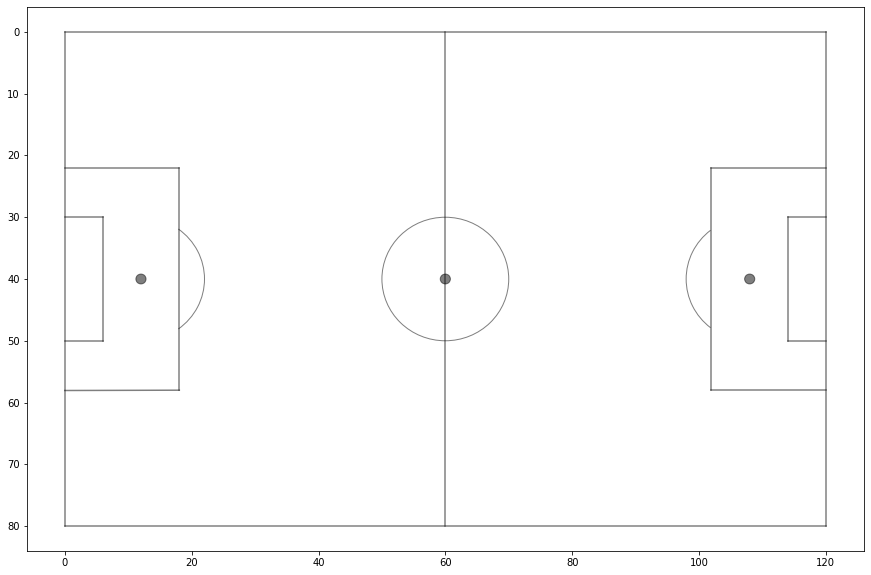

In [13]:
#plot the soccer field 120yards * 80yards
from matplotlib.patches import Arc
def createPitch(linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.

    """
    length = 120
    width = 80
    #check unity again
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(15,10)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor, alpha =0.5)
    plt.plot([0,length],[width,width], color=linecolor, alpha =0.5)
    plt.plot([length,length],[width,0], color=linecolor, alpha =0.5)
    plt.plot([length,0],[0,0], color=linecolor, alpha =0.5)
    plt.plot([length/2,length/2],[0,width], color=linecolor, alpha =0.5)

    #Left Penalty Area
    plt.plot([18.05 ,18.05],[(width/2 + 18.05),(width/2-18.05)],color=linecolor, alpha =0.5)
    plt.plot([0,18.05],[(width/2 +18.05),(width/2 +18.0)],color=linecolor, alpha =0.5)
    plt.plot([18.05,0],[(width/2 -18.05),(width/2 - 18.05)],color=linecolor, alpha =0.5)

    #Right Penalty Area
    plt.plot([(length-18.05),length],[(width/2 +18.05),(width/2 +18.05)],color=linecolor, alpha =0.5)
    plt.plot([(length-18.05), (length-18.05)],[(width/2 +18.05),(width/2-18.05)],color=linecolor, alpha =0.5)
    plt.plot([(length-18.05),length],[(width/2 -18.05),(width/2 - 18.05)],color=linecolor, alpha =0.5)

    #Left 6-yard Box
    plt.plot([0,6],[(width/2+8/2+6),(width/2+8/2+6)],color=linecolor, alpha =0.5)
    plt.plot([6,6],[(width/2+8/2+6),(width/2-8/2-6)],color=linecolor, alpha =0.5)
    plt.plot([6,0],[(width/2-8/2-6),(width/2-8/2-6)],color=linecolor, alpha =0.5)

    #Right 6-yard Box
    plt.plot([length,length-6],[(width/2+8/2+6),(width/2+8/2+6)],color=linecolor, alpha =0.5)
    plt.plot([length-6,length-6],[(width/2+8/2+6),width/2-8/2-6],color=linecolor, alpha =0.5)
    plt.plot([length-6,length],[(width/2-8/2-6),width/2-8/2-6],color=linecolor, alpha =0.5)

    #Prepare Circles; 10 yards distance. penalty on 12 yards
    centreCircle = plt.Circle((length/2,width/2),10,color=linecolor, alpha =0.5,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor, alpha =0.5)
    leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor, alpha =0.5)
    rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor, alpha =0.5)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((12.02,width/2),height=20,width=20,angle=0,theta1=306,theta2 = 54,color=linecolor, alpha =0.5)
    rightArc = Arc((length-12.02,width/2),height=20,width=20,angle=0,theta1=128,theta2=232,color=linecolor, alpha =0.5)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    #Tidy Axes
#     plt.axis('off')
    
    return fig,ax
createPitch('black')

The number of obtacles is 0


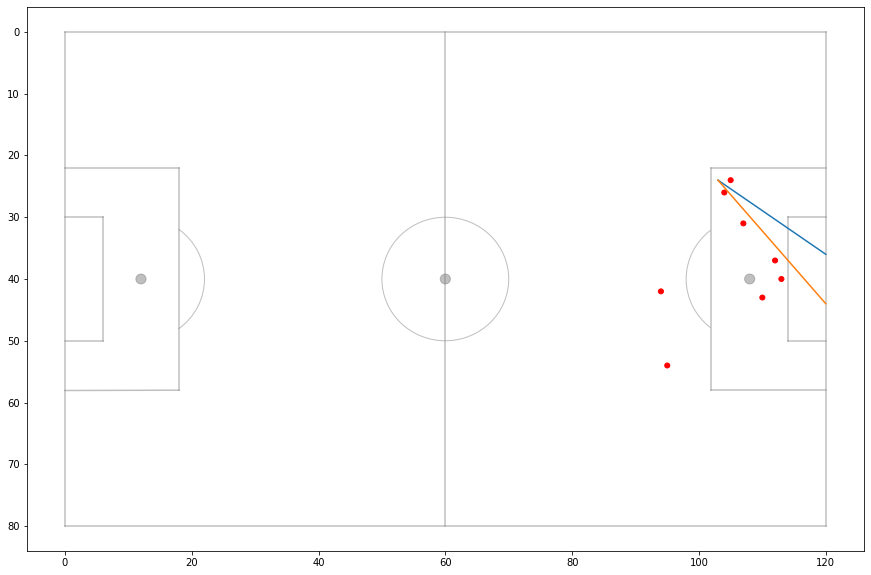

In [14]:
# visualize the setting of a shot and check if the obstacles variable is calculated correctly
def freeze_frame(data, i):
    (fig,ax) = createPitch('gray')

    #Plot the shots
    pos = data.location[i]
    m = data.shot_freeze_frame[i]
    post1 = [120,36]
    post2 = [120,44]

    a1 = (pos[1]-post1[1])/(pos[0]-post1[0])
    b1 = (pos[1]*post1[0] - pos[0]*post1[1])/(post1[0]-pos[0])
    line1 = [a1,b1,-1]

    a2 = (pos[1]-post2[1])/(pos[0]-post2[0])
    b2 = (pos[1]*post2[0] - pos[0]*post2[1])/(post2[0]-pos[0])
    line2 = [a2,b2,-1]
    plt.plot([pos[0], post1[0]], [pos[1], post1[1]])
    plt.plot([pos[0], post2[0]], [pos[1], post2[1]])

    circleSize = 0.4
    for j in m:
        if (not j['teammate']) and (j['position']['name'] != 'Goalkeeper'):
            x = j['location'][0]
            y = j['location'][1]
            shotCircle = plt.Circle((x,y),circleSize,color="red")
            ax.add_patch(shotCircle)
    print('The number of obtacles is',data.obstacles[i])

freeze_frame(data1,2)

In [15]:
#drop uncessary column
try:
    data1.drop(['location', 'gk_name', 'full_name',  'shot_freeze_frame', 'play_pattern_name', 'shot_technique_name', 'team_name', "X", "Y" ], axis = 1, inplace = True)
except:
    pass

<b>Preprocess some variables to remove headers from the dataset and to add a new varaible that tells whether a shot is made with strong foot</b>

In [16]:
for i in data1[data1.shot_body_part_name == 'Other'].index:
    data1.at[i,'shot_body_part_name'] = "Left Foot" 
    

In [17]:
data1['body_part'] = data1['shot_body_part_name'].apply(lambda x: 'Shoot' if len(x.split(" ")) == 2 else "Header")

In [18]:
data1['what_foot'] = 0
for i, row in data1.iterrows():
    part_name = row.shot_body_part_name
    if part_name != "Head":
        what = part_name.split(" ")[0]
        if what != data1.at[i,'preferred_foot']:
            data1.at[i,'what_foot'] = 1
        

In [19]:
#there are 361 shots made by weak foot
sum(data1['what_foot'])

361

In [20]:
data1['weakfoot'] = data1['weak_foot']*data1['what_foot']

In [21]:
binary_variable = ['body_part']
def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new
data1 = onehot_encode(data1, 'body_part')

In [22]:
#Classify output variable
def off_target(x):
    if x in ['Off T', 'Wayward', 'Blocked']:
        return(1)
    else:
        return(0)
data1['output'] = data1.shot_outcome_name.apply(lambda x: off_target(x))

In [23]:
try:
    data1.drop(['shot_body_part_name', 'shot_outcome_name', 'shot_type_name', 'shooter_name', 'gk_name', 'full_name', 'body_part'], axis = 1, inplace = True)
except:
    pass



In [24]:
data1_ = data1.dropna()
#shot dataset
df_shoot = data1_[data1_.Shoot ==1]
#header dataset, but it is not used in this project
df_header = data1_[data1_.Header ==1]

# P(on target)

In [25]:
#area under the curve
#borrowed from Quan Tran M21
import matplotlib.pyplot as plt
from sklearn import metrics
def plot_roc(fpr, tpr, auc):
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('AUC for validation is: %0.2f' % auc)
    plt.show()

In [26]:
#distribution plot
import seaborn as sns
def density_plot(pred_proba, label):
    class1 = []
    class0 = []
    for i in range(len(label)):
        if label[i] == 1:
            class1.append(i)
        else:
            class0.append(i)

    sns.distplot(pred_proba[:,1][class1], hist = False,kde_kws={'clip': (0.0, 1.0)}, label = 'Class 1')
    sns.distplot(pred_proba[:,1][class0], hist = False, kde_kws={'clip': (0.0, 1.0)}, label = 'Class 0')
    plt.title('Density distribution of 2 classes')


In [27]:
#summarize the data
df_shoot.groupby('output').size()

output
0    301
1    751
dtype: int64

Classification report for classifier LogisticRegression(C=1000000, class_weight='balanced', max_iter=400):
              precision    recall  f1-score   support

           0       0.39      0.64      0.48        89
           1       0.81      0.60      0.69       227

    accuracy                           0.61       316
   macro avg       0.60      0.62      0.58       316
weighted avg       0.69      0.61      0.63       316



*********

accuracy :
0.61
f-score is :
0.69
precision score is :
0.81


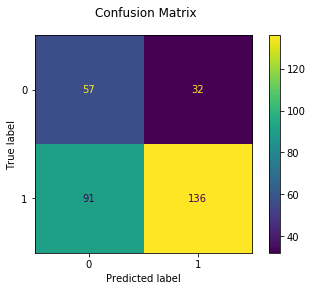


*********



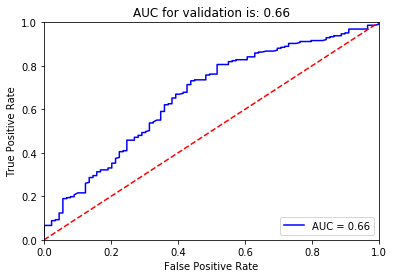


*********



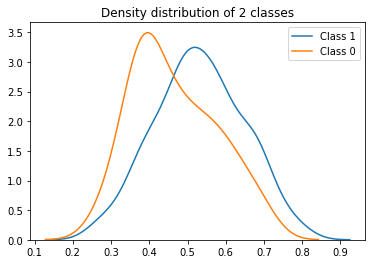

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_target = df_shoot[['distance', 'tan_angle', 'obstacles']]
Y_target = df_shoot.output


X_target_train, X_target_test, Y_target_train, Y_target_test = train_test_split(X_target, Y_target, test_size = 0.3, random_state = 42)

lf = LogisticRegression(class_weight = 'balanced', max_iter = 400, C = 1000000)
lf.fit(X_target_train, Y_target_train)
target_pred = lf.predict(X_target_test)
target_pred_prob = lf.predict_proba(X_target_test)



print("Classification report for classifier %s:\n%s\n"
      % (lf, metrics.classification_report(Y_target_test, target_pred)))
disp = metrics.plot_confusion_matrix(lf, X_target_test, Y_target_test)
disp.figure_.suptitle("Confusion Matrix")
print('')
print('*********')
print('')

print("accuracy :\n%s" % np.round(metrics.accuracy_score(Y_target_test, target_pred), 2))
print("f-score is :\n%s" % np.round(metrics.f1_score(Y_target_test, target_pred), 2))
print("precision score is :\n%s" % np.round(metrics.precision_score(Y_target_test, target_pred), 2))
plt.show()
print('')
print('*********')
print('')

fpr, tpr, thresholds = metrics.roc_curve(Y_target_test, target_pred_prob[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)
plot_roc(fpr, tpr, auc)
plt.show()

print('')
print('*********')
print('')
density_plot(target_pred_prob, Y_target_test.to_list())


# P(goal|on target)

In [29]:
#data2 records information of on-target shots
data2 = df_shoot[df_shoot.output == 0]
data2 = data2.drop('output', axis = 1)
data2['output'] = data2['shot_outcome_name'].apply(lambda x: 1 if x == 'Goal' else 0)
data2.groupby('output').size()

output
0    223
1     78
dtype: int64

<b>logistic regression</b>

Classification report for classifier LogisticRegression(C=100000, class_weight='balanced', max_iter=10000):
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        68
           1       0.36      0.52      0.43        23

    accuracy                           0.65        91
   macro avg       0.59      0.61      0.59        91
weighted avg       0.70      0.65      0.67        91



*********

accuracy :
0.65
f-score is :
0.43
precision score is :
0.36


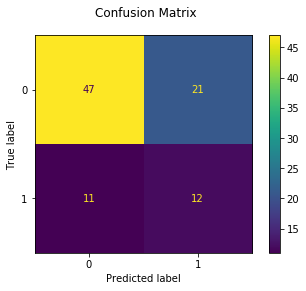


*********



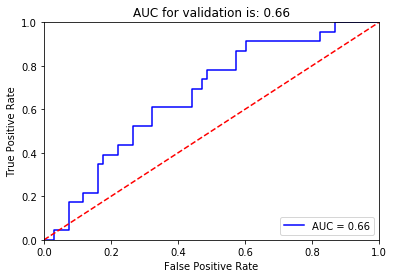


*********



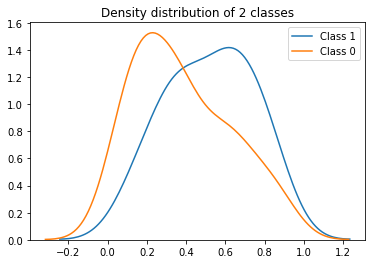

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


X_goal = data2[['distance', 'tan_angle', 'sho', 'finishing', 'shot_power', 'long_shots', 'balance', 'positioning', 'weakfoot', 'gk', 'gk_diving', 'gk_handling',
       'gk_positioning', 'gk_reflexes', 'obstacles']]
Y_goal = data2.output


X_goal_train, X_goal_test, Y_goal_train, Y_goal_test = train_test_split(X_goal, Y_goal, test_size = 0.3, random_state = 42)


lf = LogisticRegression( class_weight = 'balanced', max_iter = 10000, C = 100000)
lf.fit(X_goal_train, Y_goal_train)
goal_pred = lf.predict(X_goal_test)
goal_pred_prob = lf.predict_proba(X_goal_test)

print("Classification report for classifier %s:\n%s\n"
      % (lf, metrics.classification_report(Y_goal_test, goal_pred)))
disp = metrics.plot_confusion_matrix(lf, X_goal_test, Y_goal_test)
disp.figure_.suptitle("Confusion Matrix")
print('')
print('*********')
print('')

print("accuracy :\n%s" % np.round(metrics.accuracy_score(Y_goal_test, goal_pred), 2))
print("f-score is :\n%s" % np.round(metrics.f1_score(Y_goal_test, goal_pred), 2))
print("precision score is :\n%s" % np.round(metrics.precision_score(Y_goal_test, goal_pred), 2))
plt.show()
print('')
print('*********')
print('')

fpr, tpr, thresholds = metrics.roc_curve(Y_goal_test, goal_pred_prob[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)
plot_roc(fpr, tpr, auc)
plt.show()

print('')
print('*********')
print('')
density_plot(goal_pred_prob, Y_goal_test.to_list())


<b>SVC with rbf kernel function <b>

Classification report for classifier SVC(C=100000000, probability=True):
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        68
           1       0.30      0.35      0.32        23

    accuracy                           0.63        91
   macro avg       0.53      0.53      0.53        91
weighted avg       0.65      0.63      0.64        91



*********

accuracy :
0.63
f-score is :
0.32
precision score is :
0.3


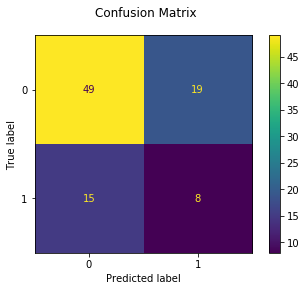


*********



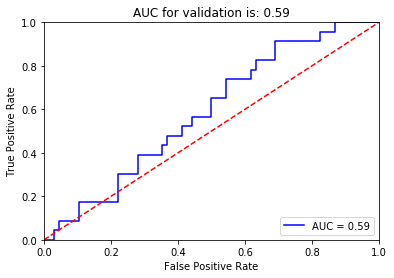


*********



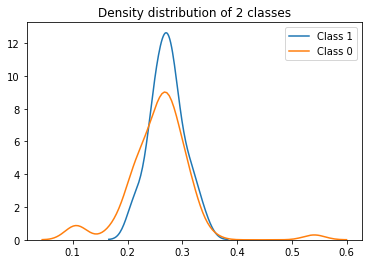

In [31]:
lf = SVC(kernel = 'rbf', C=100000000, probability = True)
lf.fit(X_goal_train, Y_goal_train)
goal_pred = lf.predict(X_goal_test)
goal_pred_prob = lf.predict_proba(X_goal_test)


print("Classification report for classifier %s:\n%s\n"
      % (lf, metrics.classification_report(Y_goal_test, goal_pred)))
disp = metrics.plot_confusion_matrix(lf, X_goal_test, Y_goal_test)
disp.figure_.suptitle("Confusion Matrix")
print('')
print('*********')
print('')

print("accuracy :\n%s" % np.round(metrics.accuracy_score(Y_goal_test, goal_pred), 2))
print("f-score is :\n%s" % np.round(metrics.f1_score(Y_goal_test, goal_pred), 2))
print("precision score is :\n%s" % np.round(metrics.precision_score(Y_goal_test, goal_pred), 2))
plt.show()
print('')
print('*********')
print('')

fpr, tpr, thresholds = metrics.roc_curve(Y_goal_test, goal_pred_prob[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)
plot_roc(fpr, tpr, auc)
plt.show()

print('')
print('*********')
print('')
density_plot(goal_pred_prob, Y_goal_test.to_list())


<b>Logistic regression but use shot_statsbomb_xg as the only predictor <b>

Classification report for classifier LogisticRegression(C=100000, class_weight='balanced', max_iter=400):
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        68
           1       0.52      0.57      0.54        23

    accuracy                           0.76        91
   macro avg       0.68      0.69      0.69        91
weighted avg       0.77      0.76      0.76        91



*********

accuracy :
0.76
f-score is :
0.54
precision score is :
0.52


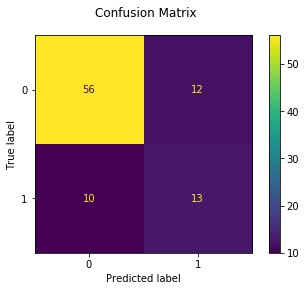


*********



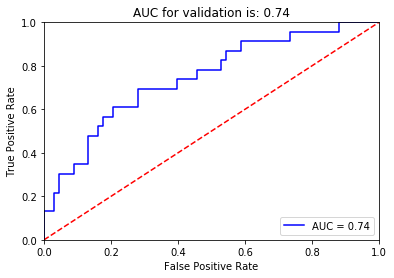


*********



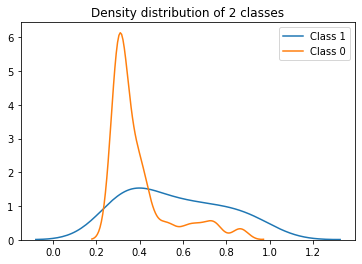

In [32]:
from sklearn.model_selection import train_test_split


X_goal = np.array(data2['shot_statsbomb_xg']).reshape(-1,1)
Y_goal = data2.output


X_goal_train, X_goal_test, Y_goal_train, Y_goal_test = train_test_split(X_goal, Y_goal, test_size = 0.3, random_state = 42)


lf = LogisticRegression( class_weight = 'balanced', max_iter = 400, C = 100000)
lf.fit(X_goal_train, Y_goal_train)
goal_pred = lf.predict(X_goal_test)
goal_pred_prob = lf.predict_proba(X_goal_test)

print("Classification report for classifier %s:\n%s\n"
      % (lf, metrics.classification_report(Y_goal_test, goal_pred)))
disp = metrics.plot_confusion_matrix(lf, X_goal_test, Y_goal_test)
disp.figure_.suptitle("Confusion Matrix")
print('')
print('*********')
print('')

print("accuracy :\n%s" % np.round(metrics.accuracy_score(Y_goal_test, goal_pred), 2))
print("f-score is :\n%s" % np.round(metrics.f1_score(Y_goal_test, goal_pred), 2))
print("precision score is :\n%s" % np.round(metrics.precision_score(Y_goal_test, goal_pred), 2))
plt.show()
print('')
print('*********')
print('')

fpr, tpr, thresholds = metrics.roc_curve(Y_goal_test, goal_pred_prob[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)
plot_roc(fpr, tpr, auc)
plt.show()

print('')
print('*********')
print('')
density_plot(goal_pred_prob, Y_goal_test.to_list())
